In [4]:
from matplotlib import pyplot as plt
import numpy as np

P(source | lambda) and Weighted-P(source | lambda) over time, where lambda is an empty source
* Blue - KT Estimate
* Green - Weighted Probability, function of KT Estimates over time 

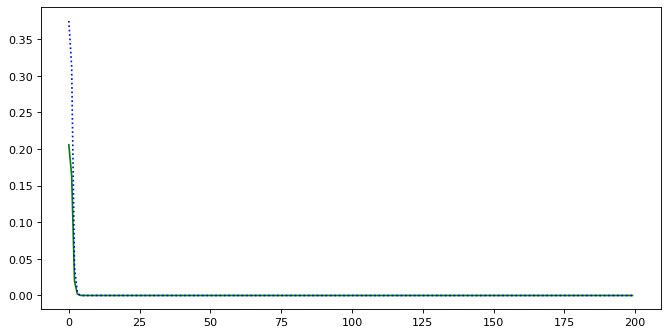

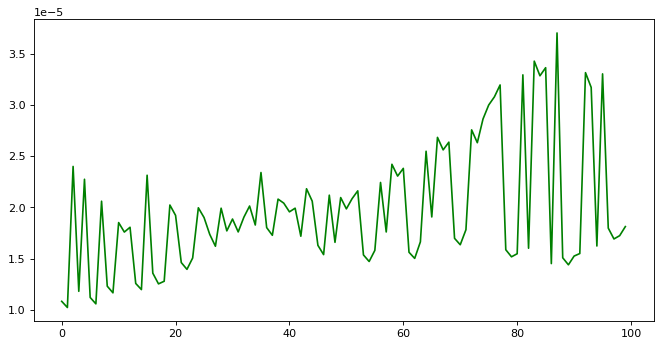

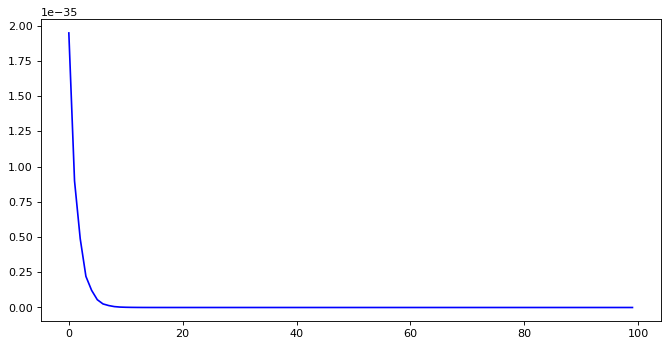

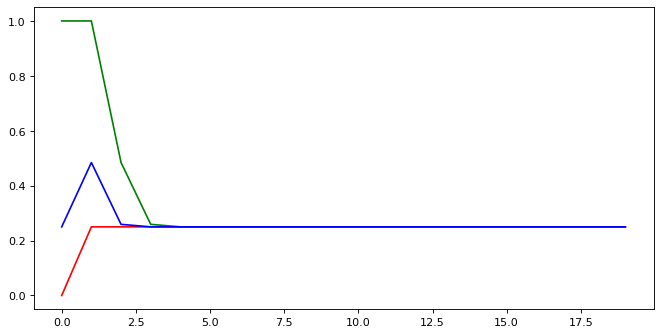

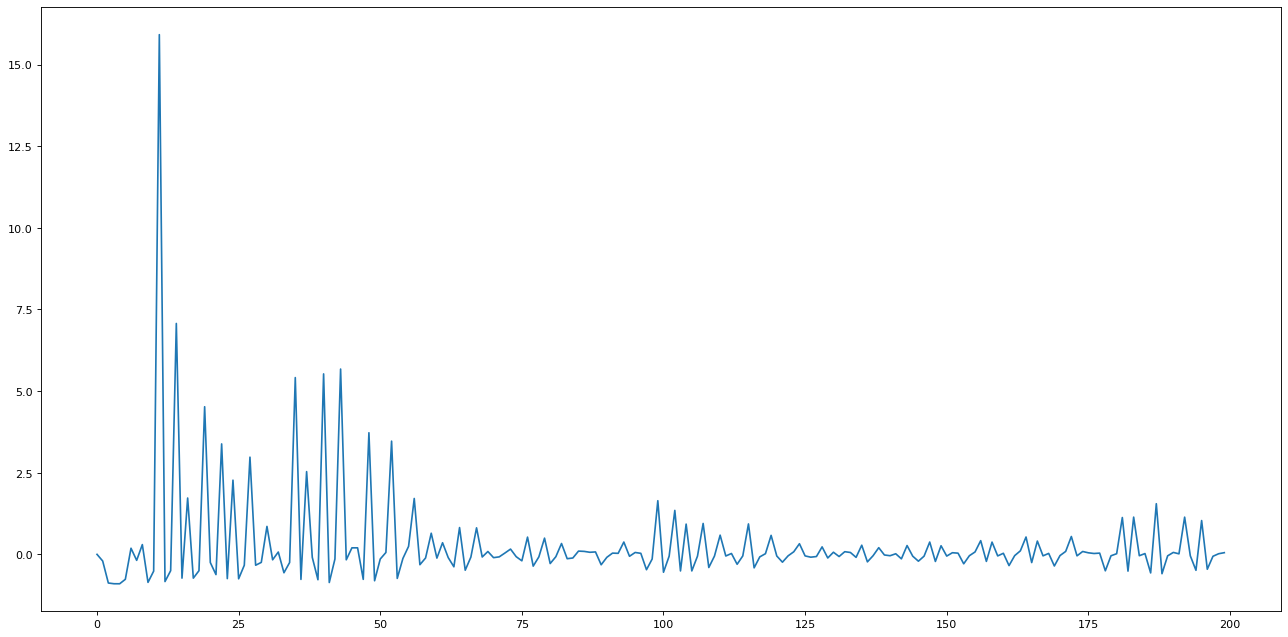

In [69]:
from math import log2


data = np.loadtxt("probs.txt")
dataKT = np.loadtxt("ktprobs.txt")
ind = int(len(data) * 0.5)
bytedata = np.loadtxt("bytedata.txt")

plt.figure(figsize=(10, 5), dpi=80)
plt.plot(data, 'g-', dataKT, "b:")

plt.figure(figsize=(10, 5), dpi=80)
plt.plot(data[ind:], 'g-')

plt.figure(figsize=(10, 5), dpi=80)
plt.plot(dataKT[ind:], "b-")

# ranger2 = np.zeros(len(data))
# ranger2[0] = data[0]
# for x in range(1,len(data)):
#     ranger2[x] = ranger2[x-1] * data[x] + data[x-1]
# plt.figure(figsize=(20, 10), dpi=80)
# plt.plot(ranger2[ind:], "b-")

upper = np.ones(len(data))
lower = np.zeros(len(data))
split = np.zeros(len(data))
split[0] = 0.25
for x,_ in enumerate(data,1):
    if x == len(data): break
    if bytedata[x] == 0:
        lower[x] = split[x-1] 
        upper[x] = upper[x-1] 
    elif bytedata[x] == 1:
        lower[x] = lower[x-1] 
        upper[x] = split[x-1] 
    dif = upper[x] - lower[x]
    split[x] = dataKT[x] * dif + lower[x] 
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(upper[:20],"g-", lower[:20], "r-", split[:20], "b-")

# plt.figure(figsize=(20, 10), dpi=80)
# ranger = np.zeros(len(data))
# for x in range(len(data)):
#     ranger[x] = x
# plt.figure(figsize=(20, 10), dpi=80)
# plt.errorbar(x=ranger, y=data, yerr= bytedata)

# logger =  np.zeros(len(data))
# for i,x in enumerate(data):
#     logger[i] = -log2(x)
    
# plt.figure(figsize=(20, 10), dpi=80)
# plt.plot(logger)

change =  np.zeros(len(data))
for i,x in enumerate(data, 1):
    if i == len(data): break
    change[i] = (data[i] - data[i-1]) / data[i-1]
    
plt.figure(figsize=(20, 10), dpi=80)
plt.plot(change)

plt.show()

